In [ ]:
##  ..... Logistic Regression Model ... ##

In [1]:
import numpy as np
import os 
import tensorflow as tf
import keras
import pandas as pd 
import matplotlib.pyplot as plt 
import pathlib
from PIL import ImageFilter, ImageOps, Image


In [73]:
import cv2
from sklearn.model_selection import train_test_split

In [2]:
train_path = pathlib.Path("C:\\Users\\Abhijith_Kumble\\Desktop\\IEEE\\brain_tumor\\Training").with_suffix('')
test_path = pathlib.Path("C:\\Users\\Abhijith_Kumble\\Desktop\\IEEE\\brain_tumor\\Testing").with_suffix('')


In [3]:
print(train_path, test_path)

C:\Users\Abhijith_Kumble\Desktop\IEEE\brain_tumor\Training C:\Users\Abhijith_Kumble\Desktop\IEEE\brain_tumor\Testing


In [4]:
image_count = len(list(train_path.glob('*/*.jpg')))
print(image_count, len(list(os.listdir(str(test_path)+'\\glioma'))))

5712 300


In [5]:
## list of all image paths 

glioma = list(train_path.glob('glioma/*')) + list(test_path.glob('glioma/*'))
meningioma = list(train_path.glob('meningioma/*')) + list(test_path.glob('meningioma/*'))
notumor = list(train_path.glob('notumor/*')) + list(test_path.glob('notumor/*'))
pituitary = list(train_path.glob('pituitary/*')) + list(test_path.glob('pituitary/*'))

In [ ]:
print( len(glioma), glioma)
print('\n', len(meningioma), meningioma)
print('\n', len(notumor), notumor)
print('\n', len(pituitary), pituitary)

In [6]:
im1= Image.open(glioma[0])
im1.show()

In [7]:
im1.size

(512, 512)

In [8]:
batch_size = 32
img_height = 512
img_width = 512

In [11]:
no_of_images_of_glioma = len(glioma)
no_of_images_of_pituitary = len(pituitary)
no_of_images_of_meningioma = len(meningioma)
no_of_images_of_notumor = len(notumor)

In [12]:
print(no_of_images_of_pituitary, no_of_images_of_glioma,no_of_images_of_meningioma,no_of_images_of_notumor)

1757 1621 1645 2000


In [13]:
no_of_images_in_each_category = [ no_of_images_of_glioma,no_of_images_of_meningioma,no_of_images_of_pituitary, no_of_images_of_notumor,]

In [15]:
print(no_of_images_in_each_category)

[1621, 1645, 1757, 2000]


In [14]:
class_names = [ f"glioma({no_of_images_of_glioma})" , f"meningioma({no_of_images_of_meningioma})" ,  f"pituitary({no_of_images_of_pituitary})", f"notumor({no_of_images_of_notumor})"]

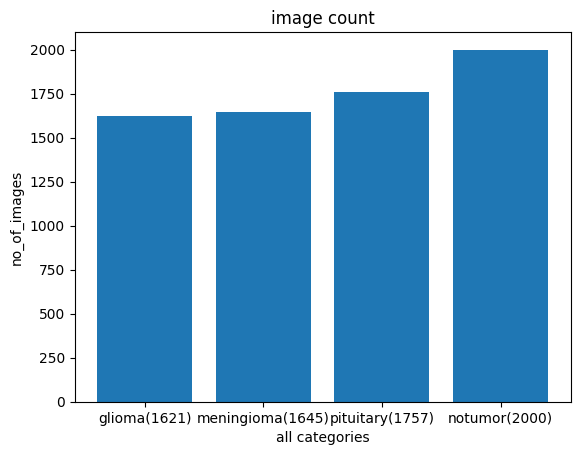

In [16]:
plt.bar(class_names, no_of_images_in_each_category)

plt.xlabel('all categories')
plt.ylabel('no_of_images')
plt.title("image count")


plt.show()


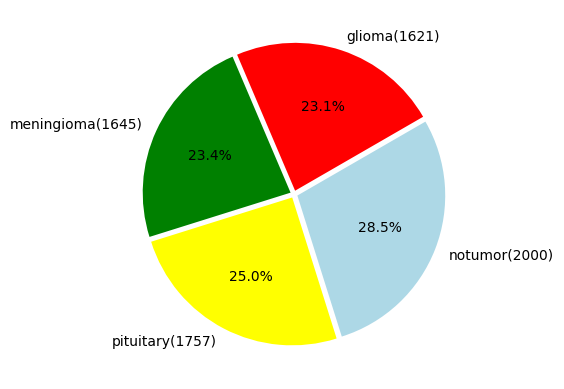

In [18]:
plt.pie(no_of_images_in_each_category, 
        labels=class_names,
        colors=['red', 'green', 'yellow','lightblue'], 
        autopct='%.1f%%', startangle=30,
        explode=(0.025,0.025,0.025,0.025,));

In [ ]:
'''X =[]
Y =[]'''

In [34]:
'''def equalization(image):
    equalized_image = ImageOps.equalize(image)

    return equalized_image'''

In [35]:
'''def gaussian_filter(image):
    
    # ImageFilter for using filter() function
    # Blurring image by sending the ImageFilter.
    # GaussianBlur predefined kernel argument

    filtered_image = image.filter(ImageFilter.GaussianBlur)
  
    # Displaying the image
   

    return filtered_image'''

In [36]:
'''##imgs = glioma / pituitary / meningioma / notumor

def resizing(imgs, name_of_the_class):
    ##file_dir= (str(imgs[0]).split('\\'))[1]
    for each in imgs:
        # open image file
        image = Image.open(each)

        ## convert to grayscale image 

        image = image.convert('L')

        # resize image
        width, height = image.size
        new_size = (112, 112)    
        resized_image = image.resize(new_size)

        #applying gaussian filter 

        filtered_image = gaussian_filter(resized_image)


        ## equalization of images 

        equalized_image = equalization(filtered_image)

        ## image name

        p= str(each).split('\\')[-1]
        file_name = p.split('.')
        
        file_name = file_name[0]+"_resized."+file_name[1]
        # save resized image
        resized_image.save(str(train_path) + "\\resized" + f"\\resized_{file_dir}"+"\\"+file_name)
        resized_image.close()

        

        ## Add to the array 
        X.append(equalized_image)
    p=[]
    if(name_of_the_class=="glioma"):
        p.append(0)
        Y=Y+p*len(imgs)
        p.clear
    if(name_of_the_class=="meningioma"):
        p.append(0)
        Y=Y+p*len(imgs)
        p.clear
    if(name_of_the_class=="pituitary"):
        p.append(0)
        Y=Y+p*len(imgs)
        p.clear
    if(name_of_the_class=="notumor"):
        p.append(0)
        Y=Y+p*len(imgs)
        p.clear

'''
       
    

In [130]:
'''resizing(glioma)
resizing(pituitary)
resizing(notumor)
resizing(meningioma)'''

In [7]:
'''data = []
data= processed_glioma + processed_meningioma + processed_notumor + processed_pituitary 
 1. meningioma
    2. glioma
    3. pituitary tumor
    4. notumor

data_label = []
data_label = data_label + [2]*len(processed_glioma) + [1]*len(processed_meningioma) + [4]*len(processed_notumor) + [3]*len(processed_pituitary)
'''


In [19]:
## Data Preprocessing 

In [22]:
path = 'C:\\Users\\Abhijith_Kumble\\Desktop\\IEEE\\brain_Tumor_final\\brain_tumor'


In [109]:
## glioma =0, 

X_train = []
Y_train = []
image_size = 112
labels = ['glioma','meningioma','notumor','pituitary']
for i in labels:
    folderPath = os.path.join(path+'\\Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        filtered_img= cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)
        equalized_img = cv2.equalizeHist(filtered_img)
        X_train.append(equalized_img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(path+'\\Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        filtered_img= cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)
        equalized_img = cv2.equalizeHist(filtered_img)
        X_train.append(gray)
        Y_train.append(i)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [110]:
print(X_train.shape, Y_train.shape)

(7023, 112, 112) (7023,)


In [111]:
Y_train[Y_train=='glioma']=0
Y_train[Y_train=='meningioma']=1
Y_train[Y_train=='notumor']=2
Y_train[Y_train=='pituitary']=3

In [112]:
Y_train=Y_train.astype('int32')

In [113]:
Y_train

array([0, 0, 0, ..., 3, 3, 3])

In [114]:
print(len(X_train), len(Y_train))
print(X_train.shape, Y_train.shape)

7023 7023
(7023, 112, 112) (7023,)


In [115]:
X_train_orig = np.copy(X_train)
Y_train_orig = np.copy(Y_train)

In [116]:
X_train= X_train.reshape(len(X_train),-1)

In [97]:
from keras.utils import to_categorical

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.163, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1995, random_state=42)

In [118]:
print(len(x_train),len(x_test),len(y_train),len(y_test),len(y_val),len(x_val))


4705 1145 4705 1145 1173 1173


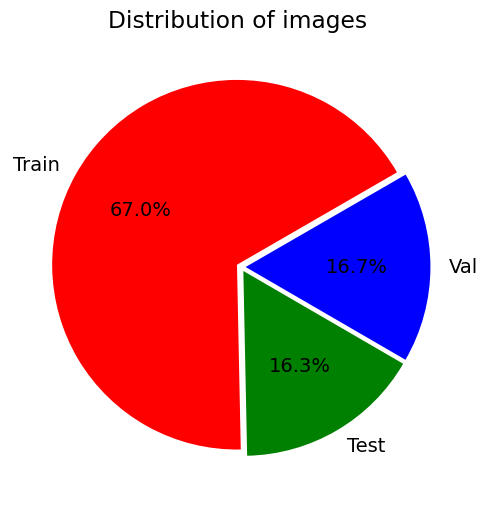

In [102]:
plt.figure(figsize=(14,6))
colors = ['red', 'green', 'blue']
plt.rcParams.update({'font.size': 14})
plt.title('Distribution of images ')
plt.pie([len(x_train), len(x_test), len(x_val)],
        labels=['Train', 'Test', 'Val'],
        colors=colors, autopct='%.1f%%', explode=(0.025, 0.025,0.025),
        startangle=30);


In [82]:
from PIL import ImageEnhance
import random 

In [ ]:
## Multiclass Logistic Regression Model 

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [103]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=50000)

In [119]:
# train the model on the training set
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=50000, multi_class='multinomial')

In [133]:
import joblib

In [134]:
# Save the model 
joblib.dump(logistic_model, 'logistic_regression_model.pkl')

##logistic_model.save('logistice_model.h5')

['logistic_regression_model.pkl']

In [135]:
# Load the saved model from the file
logistic_model = joblib.load('logistic_regression_model.pkl')

In [136]:
# make predictions on the test set
y_pred = logistic_model.predict(x_test)

In [137]:
# evaluate the model's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

## Precision 
precision = precision_score(y_test, y_pred, average="weighted")
## Recall 
recall = recall_score(y_test, y_pred, average="weighted")
## F1- score 
f1 = f1_score(y_test, y_pred, average="weighted")
## confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [138]:
print("Validation accuracy:", round(accuracy,4)*100,'%')
print("Precision :", round(precision,4))
print("Recall :", round(recall,4))
print("f1score:", round(f1,4))
print("COnfusion Matrix :\n" ,conf_mat)

Validation accuracy: 85.59 %
Precision : 0.8561
Recall : 0.8559
f1score: 0.8559
COnfusion Matrix :
 [[231  35   8   2]
 [ 25 208  16  19]
 [  4  15 298   8]
 [ 10  14   9 243]]
